In [1]:
import json
import numpy as np
import os
from pathlib import Path
import pandas as pd
from ast import literal_eval
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_extraction import FeatureHasher
from sentence_transformers import SentenceTransformer
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


c:\Users\Zeerak\anaconda3\envs\junction\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

VESPENE_UNITS = ["Assimilator", "Extractor", "Refinery"]

SUPPLY_UNITS = ["Overlord", "Overseer", "Pylon", "SupplyDepot"]

WORKER_UNITS = ["Drone", "Probe", "SCV", "MULE"]

BASE_UNITS = ["CommandCenter", "Nexus", "Hatchery", "Lair", "Hive", "PlanetaryFortress", "OrbitalCommand"]

GROUND_UNITS = ["Barracks", "Factory", "GhostAcademy", "Armory", "RoboticsBay", "RoboticsFacility", "TemplarArchive",
                "DarkShrine", "WarpGate", "SpawningPool", "RoachWarren", "HydraliskDen", "BanelingNest", "UltraliskCavern",
                "LurkerDen", "InfestationPit"]

AIR_UNITS = ["Starport", "FusionCore", "RoboticsFacility", "Stargate", "FleetBeacon", "Spire", "GreaterSpire"]

TECH_UNITS = ["EngineeringBay", "Armory", "GhostAcademy", "TechLab", "FusionCore", "Forge", "CyberneticsCore",
              "TwilightCouncil", "RoboticsFacility", "RoboticsBay", "FleetBeacon", "TemplarArchive", "DarkShrine",
              "SpawningPool", "RoachWarren", "HydraliskDen", "BanelingNest", "UltraliskCavern", "LurkerDen", "Spire",
              "GreaterSpire", "EvolutionChamber", "InfestationPit"]

ARMY_UNITS = ["Marine", "Colossus", "InfestorTerran", "Baneling", "Mothership", "MothershipCore", "Changeling", "SiegeTank", "Viking", "Reaper",
              "Ghost", "Marauder", "Thor", "Hellion", "Hellbat", "Cyclone", "Liberator", "Medivac", "Banshee", "Raven", "Battlecruiser", "Nuke", "Zealot",
              "Stalker", "HighTemplar", "Disruptor", "DarkTemplar", "Sentry", "Phoenix", "Carrier", "Oracle", "VoidRay", "Tempest", "WarpPrism", "Observer",
              "Immortal", "Adept", "Zergling", "Overlord", "Hydralisk", "Mutalisk", "Ultralisk", "Roach", "Infestor", "Corruptor",
              "BroodLord", "Queen", "Overseer", "Archon", "Broodling", "InfestedTerran", "Ravager", "Viper", "SwarmHost"]

ARMY_AIR = ["Mothership", "MothershipCore", "Viking", "Liberator", "Medivac", "Banshee", "Raven", "Battlecruiser",
            "Viper", "Mutalisk", "Phoenix", "Oracle", "Carrier", "VoidRay", "Tempest", "Observer", "WarpPrism", "BroodLord",
            "Corruptor", "Observer", "Overseer"]



def count_unit_type(player_units):
    count_dict = {}
    unit_types = [
    'SUPPLY_UNITS',
    'WORKER_UNITS',
    'ARMY_UNITS',
    'ARMY_AIR']

    for unit_type in unit_types:
        count_dict[unit_type] = 0
        
    for unit in player_units.keys():
        # if unit in VESPENE_UNITS: 
        #     count_dict['VESPENE_UNITS'] = count_dict['VESPENE_UNITS'] + player_units[unit]

        if unit in SUPPLY_UNITS:
            count_dict['SUPPLY_UNITS'] = count_dict['SUPPLY_UNITS'] + player_units[unit]

        if unit in WORKER_UNITS:
            count_dict['WORKER_UNITS'] = count_dict['WORKER_UNITS'] + player_units[unit]
        
        # if unit in BASE_UNITS:
        #     count_dict['BASE_UNITS'] = count_dict['BASE_UNITS'] + player_units[unit]

        # if unit in GROUND_UNITS:
        #     count_dict['GROUND_UNITS'] = count_dict['GROUND_UNITS'] + player_units[unit]

        # if unit in AIR_UNITS:
        #     count_dict['AIR_UNITS'] = count_dict['AIR_UNITS'] + player_units[unit]

        # if unit in TECH_UNITS:
        #     count_dict['TECH_UNITS'] = count_dict['TECH_UNITS'] + player_units[unit]

        if unit in ARMY_UNITS:
            count_dict['ARMY_UNITS'] = count_dict['ARMY_UNITS'] + player_units[unit]

        if unit in ARMY_AIR:
            count_dict['ARMY_AIR'] = count_dict['ARMY_AIR'] + player_units[unit]
            
    total = sum(count_dict.values())
    if count_dict['ARMY_UNITS'] != 0: count_dict['ARMY_UNITS'] = round(count_dict['ARMY_UNITS']/total, 2)
    if count_dict['WORKER_UNITS'] != 0: count_dict['WORKER_UNITS'] = round(count_dict['WORKER_UNITS']/total, 2)

    if count_dict['SUPPLY_UNITS'] != 0: count_dict['SUPPLY_UNITS'] =round(count_dict['SUPPLY_UNITS']/total, 2)
    if count_dict['ARMY_AIR'] != 0: count_dict['ARMY_AIR'] = round(count_dict['ARMY_AIR']/total, 2)
    return count_dict
        

In [133]:
count_dict = count_unit_type(player_1_units_counts[0])
total = sum(count_dict.values())
count_dict['ARMY_UNITS'] = round(count_dict['ARMY_UNITS']/total, 2)
count_dict['WORKER_UNITS'] = round(count_dict['WORKER_UNITS']/total, 2)

count_dict['SUPPLY_UNITS'] = round(count_dict['SUPPLY_UNITS']/total, 2)
count_dict['ARMY_AIR'] = round(count_dict['ARMY_AIR']/total, 2)

print(count_dict)

{'SUPPLY_UNITS': 0.0, 'WORKER_UNITS': 0.66, 'ARMY_UNITS': 0.26, 'ARMY_AIR': 0.08}


123

In [3]:
df = pd.read_json('data-old/replay_summaries.json')
df.head()

path  total_gameloops  \
0  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            24725   
1  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            18078   
2  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            12568   
3  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            10201   
4  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            19992   

   gameloop  build  winner                 map                 player_1  \
0     23381  82457     2.0      Romanticide LE  &lt;Ex0n&gt;<sp/>MaxPax   
1     16734  82457     2.0            Oxide LE  &lt;Ex0n&gt;<sp/>MaxPax   
2     11224  82457     1.0        Deathaura LE                    Rogue   
3      8857  82457     2.0  Pillars of Gold LE  &lt;인투더&gt;<sp/>SpeCial   
4     18648  82457     1.0      Romanticide LE  &lt;인투더&gt;<sp/>SpeCial   

                  player_2                                     player_1_units  \
0                    Rogue  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   
1                    Rogue  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   
2  &lt;Ex0n&gt;<sp/>MaxPax  [Hatchery, Larva, Larva, Larva, Drone, Drone, ...   
3                  PartinG  [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...   
4                  PartinG  [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...   

                                      player_2_units  
0  [Hatchery, Drone, Drone, Drone, Drone, Drone, ...  
1  [Hatchery, Drone, Drone, Drone, Drone, Drone, ...  
2  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
3  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
4  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...

In [10]:
def convert_array(arr):
    return np.array(arr)

df = pd.read_json('data.json')
df['p1_embedding'] = df['p1_embedding'].apply(lambda x: convert_array(x))
df['p2_embedding'] = df['p2_embedding'].apply(lambda x: convert_array(x))
df.dropna(inplace=True)
df = df[df['map'] != 'TEST__DOCUMENT']
df['build'] = df['build'].astype(str)
df = df.reset_index(drop=True)

In [98]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def get_embedding(text, model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')):
    return model.encode(text)

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [11]:
def parse_and_count_units(unit_str):
    unit_counts = Counter(unit_str)
    return unit_counts

player_1_units_counts = df['player_1_units'].apply(parse_and_count_units)
player_2_units_counts = df['player_2_units'].apply(parse_and_count_units)


p1_unit_types = pd.json_normalize(player_1_units_counts.apply(count_unit_type))
p1_unit_types.columns = [f'p1_{col}' for col in p1_unit_types]

p2_unit_types = pd.json_normalize(player_2_units_counts.apply(count_unit_type))
p2_unit_types.columns = [f'p2_{col}' for col in p2_unit_types]



In [12]:
p2_unit_types

p2_SUPPLY_UNITS  p2_WORKER_UNITS  p2_ARMY_UNITS  p2_ARMY_AIR
0                0.14             0.45           0.39         0.02
1                0.12             0.43           0.43         0.01
2                0.00             0.65           0.18         0.17
3                0.00             0.84           0.10         0.06
4                0.00             0.73           0.18         0.09
...               ...              ...            ...          ...
2513             0.00             0.46           0.47         0.07
2514             0.00             0.27           0.37         0.37
2515             0.00             0.81           0.12         0.06
2516             0.00             0.69           0.16         0.15
2517             0.00             0.93           0.05         0.01

[2518 rows x 4 columns]

In [13]:
df['embed_dif'] = df['p1_embedding'] - df['p2_embedding']


# df['embed_dif'] = df['p1_embedding']

final_df = df[['embed_dif', 'map', 'build', 'total_gameloops', 'winner']].copy()
final_df.columns = ['embeddings', 'map', 'build', 'total_gameloops', 'winner']
final_df = pd.concat([final_df, p1_unit_types, p2_unit_types], axis=1)


# final_df = df[['embed_dif', 'winner']].copy()
# final_df.columns = ['embeddings', 'winner']


In [16]:
embedding_df = pd.DataFrame(final_df['embeddings'].tolist(), index= final_df.index)
final_df = pd.concat([final_df.drop('embeddings', axis=1), embedding_df], axis=1)
# final_df.dropna(inplace=True)


In [17]:
X = final_df.drop('winner', axis=1)
y = final_df['winner'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
cols = [str(col) for col in X_train.columns if col not in  ['winner', 'map', 'build']]
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

scaler = StandardScaler()
scaler.fit(X_train[cols])
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])


target_encoding_cols = ['map', 'build']
encoder = TargetEncoder(cols = target_encoding_cols)
encoder.fit(X_train[target_encoding_cols], y_train.values)

X_train[target_encoding_cols] = encoder.transform(X_train[target_encoding_cols])
X_test[target_encoding_cols] = encoder.transform(X_test[target_encoding_cols])

In [41]:
cols

['total_gameloops',
 'p1_SUPPLY_UNITS',
 'p1_WORKER_UNITS',
 'p1_ARMY_UNITS',
 'p1_ARMY_AIR',
 'p2_SUPPLY_UNITS',
 'p2_WORKER_UNITS',
 'p2_ARMY_UNITS',
 'p2_ARMY_AIR',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117'

In [28]:
joblib.dump((model, encoder, scaler), 'model_and_preprocessing.pkl')


['model_and_preprocessing.pkl']

In [106]:
pca_df = pd.concat([X_train, X_test])

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=45)
X_pca = pca.fit_transform(pca_df)
X_pca = pd.DataFrame(X_pca)

In [117]:
X_pca.loc[:X_train.shape[0]-1]

0          1         2          3          4         5   \
0    -11.343205 -12.324043  0.897127  -0.546485  -0.458315  0.264168   
1     -6.818090  14.766184 -2.234994   0.699323  -0.288432  0.178650   
2    -11.535277 -12.692285 -0.467425   0.267367   0.143269 -0.131856   
3     14.303506  -2.184155 -7.299383  -4.603846  -0.435451  2.729565   
4     13.675383  -2.550906 -1.731490   7.560231  12.380080  1.121922   
...         ...        ...       ...        ...        ...       ...   
2009 -11.629214 -12.244216  0.222921  -0.494504  -0.309221 -0.153924   
2010  14.164860  -0.577667  4.253283  13.596498   2.811940  1.215854   
2011  -5.804303  16.575782 -0.661018  -1.584478  -0.376660 -1.124654   
2012 -11.385877 -12.526214  0.071060   0.139989   0.305011 -0.082239   
2013 -11.416453 -12.537955 -0.413123   0.176657  -0.006448 -0.033425   

            6         7         8         9   ...        35        36  \
0     0.683568 -0.282070  0.609146  1.532714  ...  0.116676 -0.685530   
1     0.013100  3.239082 -1.865061  0.565674  ... -1.271216 -1.200032   
2    -0.213685  0.592396 -0.958588 -1.686672  ... -0.240080  0.527219   
3    -0.680383 -2.153063  0.194098  3.100343  ...  0.746432 -0.217660   
4    -5.222424 -1.381050 -2.519616  1.538563  ...  0.268131  0.019438   
...        ...       ...       ...       ...  ...       ...       ...   
2009  0.721876 -0.054008  1.263385  1.103590  ...  0.728592 -0.471863   
2010 -3.572167 -1.316267  2.076707 -3.280151  ...  0.104121 -0.285830   
2011  0.766234 -2.454409  2.305779  0.242573  ...  1.079903 -0.878555   
2012 -0.156582  0.374590 -1.015149 -1.412491  ...  0.147333 -0.419945   
2013 -0.041713  0.634052 -0.809256 -1.285373  ... -0.061468 -0.634597   

            37        38        39        40        41        42        43  \
0     0.184021 -0.715247 -0.169988  0.819072  0.183515  0.041918 -0.046352   
1     0.876622  0.718342  0.201967 -0.157756  0.124025 -0.363627  0.138183   
2     0.545026 -0.435312  0.142356 -0.470048 -0.370235 -0.012351  0.492398   
3    -0.928446  0.114054 -0.403413 -0.010295 -0.636313  0.467213  0.616159   
4     0.118691  0.065503  0.106423  0.731540  0.196863  0.907360  0.384364   
...        ...       ...       ...       ...       ...       ...       ...   
2009 -0.063135  0.020469 -0.312692  0.202824 -0.159776 -0.001029 -0.848071   
2010 -0.558596 -0.055287  0.181652  0.244349 -1.235118 -0.426651 -0.960087   
2011 -0.218456  0.324911 -0.116518 -0.137915  0.458038 -0.428320  0.383711   
2012  0.272871 -0.439297 -0.325518  0.649295  0.462534  0.207022  0.096545   
2013  0.203337 -0.217743 -0.074994  0.873734  0.507789  0.150852  0.149975   

            44  
0     0.024368  
1    -0.647293  
2     0.023868  
3    -0.595778  
4    -0.295700  
...        ...  
2009  0.238853  
2010  0.096098  
2011  0.961406  
2012 -0.081284  
2013  0.264509  

[2014 rows x 45 columns]

In [118]:
X_pca.loc[X_train.shape[0]:]

0          1          2          3         4         5   \
2014  11.870737  -1.187040  -9.127132   4.544152  2.922707 -2.472108   
2015  14.884428  -2.309980  -2.842051 -11.551837 -4.569884  1.228553   
2016  16.672974  -0.454946   7.648621   5.947273 -0.003629 -3.211842   
2017 -11.324207 -12.564279  -0.111386   0.157578  0.102867  0.070937   
2018  14.750563  -3.206756   7.271840  11.631935  0.003128  2.676287   
...         ...        ...        ...        ...       ...       ...   
2513 -10.376163 -12.415165  -1.202621   1.591399  1.988982  0.208897   
2514  -7.317417  15.553631   0.348458   0.745571 -1.362071 -2.491425   
2515  -6.109451  15.438785  -2.266868  -0.738886  1.973128  3.354069   
2516  11.954227  -2.774993 -10.948675   1.047623  8.579287  0.842539   
2517  -4.624372  17.629071  13.350946  -1.880228  4.124436  5.292377   

            6         7         8         9   ...        35        36  \
2014 -0.667920 -1.388417  5.754671  0.697833  ...  1.220998 -0.010205   
2015 -2.568934 -1.520022  0.088339  1.388927  ... -1.773138  0.260621   
2016  2.047909 -0.533126  4.148920 -3.484329  ... -0.508060  0.041946   
2017 -0.149229  0.183799 -0.795156 -1.175689  ...  0.089760 -0.138676   
2018 -2.450981  0.422631 -3.041342  4.555797  ...  0.225798 -0.460072   
...        ...       ...       ...       ...  ...       ...       ...   
2513 -1.536902  0.370184 -2.703412 -6.136693  ...  0.370164 -0.989363   
2514 -0.498454 -2.817520 -2.703645 -0.302317  ...  0.806812 -0.180504   
2515 -1.780334  9.464714  1.101795 -0.091911  ...  0.447694  0.000795   
2516 -0.640860 -2.463810  0.980144 -0.313370  ...  0.192988 -0.038072   
2517 -4.938187 -3.940514  0.422615 -6.214538  ...  0.926162 -0.216620   

            37        38        39        40        41        42        43  \
2014  0.376734 -0.638149  0.010526 -0.208407  0.384814  0.073014 -0.221542   
2015 -0.729332  0.921532  0.209888 -0.033490 -0.106657  0.311488  0.143181   
2016 -0.516117  0.012783  0.608723  0.167509 -0.108497 -0.490442 -0.323253   
2017 -0.148952 -0.275957 -0.026204  0.401853  0.398806  0.016266  0.079191   
2018 -0.372795  0.029082 -1.023017 -0.938800 -0.356856  0.085039  0.286448   
...        ...       ...       ...       ...       ...       ...       ...   
2513  0.445824 -0.131865 -0.716876 -0.335402 -0.186014  0.579429 -0.898357   
2514 -0.408862 -1.141559 -0.746536 -1.614267  1.107305 -0.679107 -0.510777   
2515 -0.567750 -0.655847  0.637285 -0.244249  0.529248 -0.801500  0.878974   
2516 -0.125728 -0.506720  0.035183  0.373035 -0.351998 -0.400468 -0.793931   
2517 -1.001134  0.156597  0.736283  0.207512 -0.354611 -0.364963  0.822068   

            44  
2014  0.000710  
2015  0.889484  
2016  0.171346  
2017  0.178034  
2018  0.303672  
...        ...  
2513  0.202777  
2514 -0.080238  
2515  0.186648  
2516  0.048919  
2517 -0.058400  

[504 rows x 45 columns]

In [116]:
X_train

(2014, 395)

Eigenvalues:
[1.34154232e+02 1.25046194e+02 2.13340128e+01 1.46367072e+01
 1.07702443e+01 8.66657216e+00 7.72369240e+00 7.18820642e+00
 6.70340772e+00 4.88443854e+00 4.18833791e+00 3.66182579e+00
 3.07941495e+00 2.88538377e+00 2.76704564e+00 2.27977531e+00
 2.22502307e+00 2.06447919e+00 1.97625636e+00 1.81037022e+00
 1.67233958e+00 1.48767450e+00 1.36540599e+00 1.20115963e+00
 1.07473546e+00 1.02444462e+00 9.54431936e-01 8.22849666e-01
 8.00707708e-01 7.26366980e-01 6.98199631e-01 6.59443754e-01
 6.19252788e-01 5.82169419e-01 5.54391460e-01 5.11649422e-01
 4.81795824e-01 4.36314266e-01 3.97698203e-01 3.85913155e-01
 3.53338297e-01 3.26580915e-01 3.13300594e-01 2.96700080e-01
 2.71332326e-01 2.58325795e-01 2.40017063e-01 2.30151049e-01
 2.22016609e-01 2.11418023e-01 1.92733790e-01 1.85809754e-01
 1.75016191e-01 1.69665707e-01 1.63401863e-01 1.48030500e-01
 1.45425228e-01 1.41127273e-01 1.37406464e-01 1.28862475e-01
 1.27478294e-01 1.24429011e-01 1.16954357e-01 1.08151234e-01
 1.03576679

Text(0, 0.5, 'Explained variance (%)')

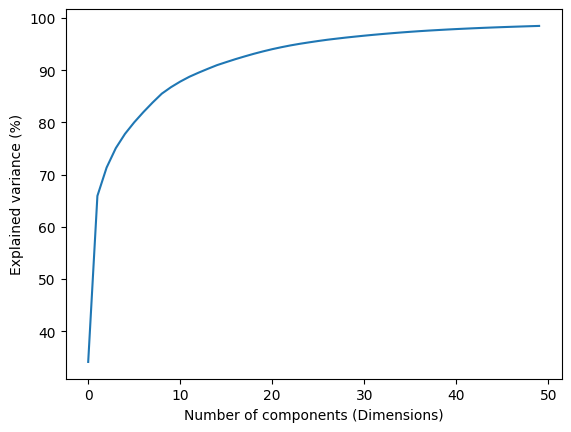

In [103]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

import matplotlib.pyplot as plt
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100)[:50])
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [119]:
X_train = X_pca.loc[:X_train.shape[0]-1]

In [166]:
clf_rep[0][]

0.6844106463878327

In [171]:
X_train

map     build  total_gameloops  p1_SUPPLY_UNITS  p1_WORKER_UNITS  \
1314  0.577485  0.525285        -1.123950        -0.041757        -1.066020   
2152  0.517543  0.500000        -0.580780        -0.598093        -0.614642   
1160  0.493617  0.479624         1.867851         1.812695         2.514912   
290   0.517543  0.502075        -0.314862        -0.598093        -0.253540   
1187  0.540116  0.525285        -0.344047        -0.598093        -0.253540   
...        ...       ...              ...              ...              ...   
1639  0.493617  0.500000         0.862940         1.719973         1.612156   
1096  0.436091  0.479624        -0.985715        -0.598093        -0.644734   
1131  0.436091  0.479624         1.337970        -0.598093         0.348298   
1295  0.540116  0.525285         0.190524         1.998140         0.829767   
861   0.493617  0.479624         0.549728         1.627250         1.732523   

      p1_ARMY_UNITS  p1_ARMY_AIR  p2_SUPPLY_UNITS  p2_WORKER_UNITS  \
1314      -0.442536    -0.718699        -0.622476        -0.770995   
2152      -0.241895    -0.235461         1.576736         1.116981   
1160       4.149417     0.972635        -0.622476        -0.209705   
290       -0.510937     0.247778         2.155476         1.423140   
1187      -0.524617     0.167238         0.997996         0.861849   
...             ...          ...              ...              ...   
1639       1.978842     1.858571        -0.622476         0.453638   
1096      -0.565657    -0.557619        -0.622476        -0.822022   
1131       0.328110     1.697492        -0.622476         1.014929   
1295       0.793233     0.650476        -0.622476        -1.077153   
861        2.088282     2.422349        -0.622476        -0.668942   

      p2_ARMY_UNITS  ...       374       375       376       377       378  \
1314      -0.837436  ... -0.957222 -0.707571 -1.037563  1.364633  0.557089   
2152       2.887886  ...  0.805982 -0.232107  1.082134 -0.029637 -0.535666   
1160      -0.407591  ... -2.033946 -1.387765  0.085152  0.960809  0.749546   
290        1.254475  ...  0.355873  0.422478 -0.039730 -0.429716  0.693247   
1187       0.795974  ...  1.011284 -0.756121 -0.078120 -0.902086  0.740249   
...             ...  ...       ...       ...       ...       ...       ...   
1639       0.967912  ... -0.719184 -0.736450 -0.842623 -0.979168  1.399162   
1096      -0.694155  ... -0.093581 -1.897854 -2.701908  1.219445  1.128560   
1131       0.624036  ... -1.133901  1.440419  0.391390 -0.239984 -0.041159   
1295      -0.923405  ...  0.044339 -0.259292  1.760475 -0.295355 -0.716362   
861        0.050910  ...  0.248160 -1.372480 -0.962245  0.569778  1.317367   

           379       380       381       382       383  
1314 -0.656528  0.931666 -0.244868  2.044804  0.099539  
2152 -0.246830 -0.650572  0.983212 -1.241298 -0.537704  
1160  0.266810  0.660469  0.620679  2.417853  0.694360  
290   0.956552  0.077085  0.296004 -1.163216 -0.946865  
1187  0.431142  0.072909 -0.857276 -1.351660 -1.663561  
...        ...       ...       ...       ...       ...  
1639  1.468204  0.644237 -0.712754  1.160732  0.000716  
1096 -0.075557  1.785108 -1.783689  0.922577 -1.449896  
1131 -1.109050 -0.882141 -0.500198  1.232443  0.088833  
1295  0.072041 -0.991694  1.575048  0.564911  1.183268  
861   2.216833  0.733531 -0.544647  0.186608 -0.558913  

[2014 rows x 395 columns]

In [26]:
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
import mlflow

def get_metrics(y_test, y_pred):
    clf_rep = metrics.precision_recall_fscore_support(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    out_dict = {
                "precision 1" :clf_rep[0][0].round(2)
                ,"precision 2" :clf_rep[0][1].round(2)
                ,"recall 1" : clf_rep[1][0].round(2)
                ,"recall 2" : clf_rep[1][1].round(2)
                ,"f1-score 1" : clf_rep[2][0].round(2)
                ,"f1-score 2" : clf_rep[2][1].round(2)
                , "accuracy" : round(accuracy, 2)
                }
    
    return out_dict

param_distributions = {
    'LogisticRegression': {
        'C': loguniform(1e-4, 1e2),
        'penalty': ['l2', 'none'],
        'solver': ['lbfgs', 'sag', 'saga'],
        'l1_ratio': uniform(0, 1)  # Only used with 'saga' solver and 'elasticnet' penalty
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20)
    },
    'SVC': {
        'C': loguniform(1e-2, 10),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'XGBClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(3, 10),
        # 'learning_rate': uniform(0.01, 0.3),
        # 'subsample': uniform(0.5, 1)
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Example layer sizes
        # 'hidden_layer_sizes': [ (100,), (200,), (300, )],  # Example layer sizes
        'activation': ['relu', 'tanh', 'logistic'],
        'alpha': loguniform(1e-4, 1e-2),
        'learning_rate_init': loguniform(1e-4, 1e-2)
    },
    'AdaBoostClassifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 1),
        # Optionally, set base_estimator if you want to experiment with other than the default
    }
}

classfication_models = [MLPClassifier]
# LogisticRegression, RandomForestClassifier, SVC, XGBClassifier,
experiment_name = "Feature: Unit Type % - Embedding Diff"
mlflow.set_tracking_uri('http://localhost:5555')
mlflow.set_experiment(experiment_name=experiment_name)

for model_class in classfication_models:
    model_name = model_class.__name__
    print(model_name)
    with mlflow.start_run(run_name = model_name):
        model = model_class()
        param_dict = param_distributions[model_name]
        
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dict, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)
        
        random_search.fit(X_train, y_train)
        y_pred = random_search.predict(X_test)
        
        ml_metrics = get_metrics(y_test, y_pred)
        mlflow.log_metrics(ml_metrics)
        for param_name, param_value in random_search.best_params_.items():
            mlflow.log_param(f'{param_name}', param_value)
    

MLPClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Zeerak\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
final_df

map  build  total_gameloops  winner  p1_SUPPLY_UNITS  \
0         Romanticide LE  82457            24725     2.0             0.00   
1               Oxide LE  82457            18078     2.0             0.00   
2           Deathaura LE  82457            12568     1.0             0.10   
3     Pillars of Gold LE  82457            10201     2.0             0.00   
4         Romanticide LE  82457            19992     1.0             0.00   
...                  ...    ...              ...     ...              ...   
2513  Pillars of Gold LE  82893            21000     2.0             0.03   
2514      Romanticide LE  82893            51954     2.0             0.03   
2515       Jagannatha LE  82893            15237     1.0             0.11   
2516            Oxide LE  82893            13558     1.0             0.08   
2517       Lightshade LE  82893            16027     1.0             0.06   

      p1_WORKER_UNITS  p1_ARMY_UNITS  p1_ARMY_AIR  p2_SUPPLY_UNITS  \
0                0.66           0.26         0.08             0.14   
1                0.82           0.15         0.03             0.12   
2                0.43           0.47         0.00             0.00   
3                0.63           0.33         0.04             0.00   
4                0.50           0.45         0.05             0.00   
...               ...            ...          ...              ...   
2513             0.18           0.79         0.00             0.00   
2514             0.13           0.82         0.03             0.00   
2515             0.33           0.55         0.00             0.00   
2516             0.33           0.59         0.00             0.00   
2517             0.25           0.69         0.00             0.00   

      p2_WORKER_UNITS  ...       374       375       376       377       378  \
0                0.45  ... -0.008781 -0.014248 -0.012181  0.050974  0.031881   
1                0.43  ... -0.023852 -0.034736  0.000747  0.019716  0.050383   
2                0.65  ... -0.005807 -0.013027  0.044050  0.036926 -0.008120   
3                0.84  ...  0.006015  0.022351  0.034943  0.025920 -0.085702   
4                0.73  ... -0.000792  0.060186 -0.005190  0.014672 -0.052212   
...               ...  ...       ...       ...       ...       ...       ...   
2513             0.46  ... -0.002637 -0.048358 -0.009976  0.007728  0.068765   
2514             0.27  ...  0.050053 -0.006405  0.039066  0.029672 -0.042518   
2515             0.81  ... -0.002667  0.002685  0.045623 -0.040023 -0.002770   
2516             0.69  ...  0.001632 -0.009310  0.071152  0.005685 -0.013309   
2517             0.93  ...  0.005064 -0.028842  0.033096  0.001546  0.005793   

           379       380       381       382       383  
0    -0.010223  0.018937 -0.011609 -0.004742 -0.023972  
1     0.017350  0.054213  0.009058 -0.031956 -0.014935  
2    -0.009215 -0.030970  0.028175  0.017473  0.021502  
3    -0.027653 -0.011248  0.008963  0.042731  0.022578  
4    -0.040175 -0.045836  0.012153  0.021584  0.020006  
...        ...       ...       ...       ...       ...  
2513  0.025756  0.021006 -0.010850  0.034275 -0.006287  
2514  0.058582  0.002066  0.006160  0.033808  0.007407  
2515  0.005558 -0.055600  0.063909 -0.005358  0.028472  
2516 -0.002688 -0.000633 -0.003516 -0.005887  0.024387  
2517 -0.014192  0.000852  0.063272  0.016792  0.017977  

[2518 rows x 396 columns]

In [22]:
model = MLPClassifier(activation='relu', alpha=0.00040596, hidden_layer_sizes=(100,), learning_rate_init=0.0001)

In [23]:
model.fit(X_train, y_train)

C:\Users\Zeerak\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.00040596, learning_rate_init=0.0001)

In [24]:
preds = model.predict(X_test)

In [25]:
metrics.accuracy_score(y_pred=preds, y_true=y_test)

0.6587301587301587

In [38]:
test_df_store = df[df.index.isin(X_test.index)].drop(['p1_embedding', 'p2_embedding', 'embed_dif'], axis=1)

In [39]:
test_df_store.to_dict()

{'path': {25: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group B\\20-11-27 21_57_37 - [Ting]Neeb vs Stats - Lightshade LE.SC2Replay',
  29: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group B\\20-11-27 23_21_43 - [AFSC2]Stats vs ByuN - Pillars of Gold LE.SC2Replay',
  43: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group C\\20-11-28 15_16_59 - maru vs TLHarstem - Oxide LE.SC2Replay',
  44: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group C\\20-11-28 15_35_28 - maru vs TLHarstem - Deathaura LE.SC2Replay',
  48: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group C\\20-11-28 17_00_38 - [TeamNV]Maru vs [Kaizi]Solar - Oxide LE.SC2Replay',
  49: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group C\\20-11-28 17_22_43 - [TeamNV]Maru vs [Kaizi]Solar - Romanticide LE.SC2Replay',
  51: 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - G

In [40]:
test_df_store

path  total_gameloops  \
25    ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            11776   
29    ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            13696   
43    ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            13769   
44    ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            20921   
48    ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            20240   
...                                                 ...              ...   
2504  TeamLiquid StarLeague 6\TSL6 Replay Pack\Upper...            20768   
2507  TeamLiquid StarLeague 6\TSL6 Replay Pack\Upper...            10451   
2513  TeamLiquid StarLeague 6\TSL6 Replay Pack\Upper...            21000   
2515  TeamLiquid StarLeague 6\TSL6 Replay Pack\Upper...            15237   
2516  TeamLiquid StarLeague 6\TSL6 Replay Pack\Upper...            13558   

      gameloop  build  winner                 map                    player_1  \
25       10432  82457     2.0       Lightshade LE       &lt;Ting&gt;<sp/>Neeb   
29       12352  82457     2.0  Pillars of Gold LE     &lt;AFSC2&gt;<sp/>Stats   
43       12425  82457     1.0            Oxide LE                        maru   
44       19577  82457     1.0        Deathaura LE                        maru   
48       18896  82457     2.0            Oxide LE     &lt;TeamNV&gt;<sp/>Maru   
...        ...    ...     ...                 ...                         ...   
2504     19424  82893     1.0       Lightshade LE                      Serral   
2507      9107  82893     2.0            Oxide LE                        Zest   
2513     19656  82893     2.0  Pillars of Gold LE  &lt;xkom&gt;<sp/>AgoElazer   
2515     13893  82893     1.0       Jagannatha LE     &lt;ENCE&gt;<sp/>Serral   
2516     12214  82893     1.0            Oxide LE     &lt;ENCE&gt;<sp/>Serral   

                     player_2  \
25                      Stats   
29                       ByuN   
43                  TLHarstem   
44                  TLHarstem   
48    &lt;Kaizi&gt;<sp/>Solar   
...                       ...   
2504                     maru   
2507                 ShoWTimE   
2513                     ByuN   
2515                 ShoWTimE   
2516                 ShoWTimE   

                                         player_1_units  \
25    [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   
29    [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   
43    [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...   
44    [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...   
48    [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...   
...                                                 ...   
2504  [Hatchery, Larva, Larva, Larva, Drone, Drone, ...   
2507  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   
2513  [Hatchery, Larva, Larva, Larva, Drone, Drone, ...   
2515  [Hatchery, Larva, Larva, Larva, Drone, Drone, ...   
2516  [Hatchery, Larva, Larva, Larva, Drone, Drone, ...   

                                         player_2_units  
25    [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
29    [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...  
43    [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
44    [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
48    [Hatchery, Drone, Drone, Drone, Drone, Drone, ...  
...                                                 ...  
2504  [SCV, SCV, SCV, SCV, SCV, SCV, SCV, SCV, SCV, ...  
2507  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
2513  [CommandCenter, SCV, SCV, SCV, SCV, SCV, SCV, ...  
2515  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  
2516  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...  

[504 rows x 10 columns]

In [71]:
import requests
import json


PREDICT_URL = 'http://localhost:5000/predict'

In [46]:
test_df_store.iloc[[9]].to_json()

'{"path":{"69":"ASUS ROG Online 2020\\\\ASUS_ROG_Online_2020_replays\\\\1 - Group Stage\\\\Group D\\\\20-11-28 22_39_45 - ShoWTimE vs [ENCE]Serral - Oxide LE.SC2Replay"},"total_gameloops":{"69":19965},"gameloop":{"69":18621},"build":{"69":"82457"},"winner":{"69":1.0},"map":{"69":"Oxide LE"},"player_1":{"69":"ShoWTimE"},"player_2":{"69":"&lt;ENCE&gt;<sp\\/>Serral"},"player_1_units":{"69":["Nexus","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Adept","Probe","Probe","Probe","Adept","Probe","Probe","Probe","Probe","Probe","Probe","Adept","Probe","Probe","Probe","Probe","VoidRay","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Oracle","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Observer","Probe","Probe","Probe","Probe","Phoenix","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","

In [74]:
json.dumps(test_df_store.iloc[[9]].to_dict('records'))

'[{"path": "ASUS ROG Online 2020\\\\ASUS_ROG_Online_2020_replays\\\\1 - Group Stage\\\\Group D\\\\20-11-28 22_39_45 - ShoWTimE vs [ENCE]Serral - Oxide LE.SC2Replay", "total_gameloops": 19965, "gameloop": 18621, "build": "82457", "winner": 1.0, "map": "Oxide LE", "player_1": "ShoWTimE", "player_2": "&lt;ENCE&gt;<sp/>Serral", "player_1_units": ["Nexus", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Adept", "Probe", "Probe", "Probe", "Adept", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Adept", "Probe", "Probe", "Probe", "Probe", "VoidRay", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Oracle", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Probe", "Observer", "Probe", "Probe", "Probe", "Probe", "Phoenix", "Probe", "Probe", "Probe", "Probe", "Probe",

In [93]:
response = requests.post(PREDICT_URL, json=json.dumps(test_df_store.iloc[[9]].drop('winner', axis=1).to_dict('records')))

In [50]:
pd.DataFrame(
{"path":{"69":"ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group D\\20-11-28 22_39_45 - ShoWTimE vs [ENCE]Serral - Oxide LE.SC2Replay"},"total_gameloops":{"69":19965},"gameloop":{"69":18621},"build":{"69":"82457"},"winner":{"69":1.0},"map":{"69":"Oxide LE"},"player_1":{"69":"ShoWTimE"},"player_2":{"69":"&lt;ENCE&gt;<sp\/>Serral"},"player_1_units":{"69":["Nexus","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Adept","Probe","Probe","Probe","Adept","Probe","Probe","Probe","Probe","Probe","Probe","Adept","Probe","Probe","Probe","Probe","VoidRay","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Oracle","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Observer","Probe","Probe","Probe","Probe","Phoenix","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Probe","Immortal","Immortal","WarpPrism","Immortal","Immortal","Probe","Probe","Immortal","Immortal","Probe","Probe","Immortal","Probe","Probe","Probe","Immortal","Probe","Probe","Probe","Probe","Immortal","Immortal","Immortal","VoidRay"]},"player_2_units":{"69":["Hatchery","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Overlord","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Overlord","Overlord","Overlord","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Drone","Overlord","Overlord","Overlord","Overlord","Overlord","Drone","Drone","Drone","Overlord","Overlord","Overlord","Overlord","Overlord","SwarmHostMP","SwarmHostMP","SwarmHostMP","SwarmHostMP","SwarmHostMP","SwarmHostMP","SwarmHostMP","Drone","Drone","SwarmHostMP","SwarmHostMP","SwarmHostMP","Overlord","SwarmHostMP","SwarmHostMP","Overlord","Overlord","Overlord","SwarmHostMP","SwarmHostMP","Overlord","Overlord","Overlord","Overlord","Overlord","Queen","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Larva","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Zergling","Larva","Zergling","Zergling","Zergling","Zergling","Zergling","Zergling","Zergling","Zergling","Larva","Larva","Larva","Roach","Roach","Roach","Roach","Roach","Larva","Roach","Larva","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","LocustMP","Roach","Larva","Larva","Roach","Roach","Roach","Roach","Larva"]}})

path  total_gameloops  \
69  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            19965   

    gameloop  build  winner       map  player_1                  player_2  \
69     18621  82457     1.0  Oxide LE  ShoWTimE  &lt;ENCE&gt;<sp\/>Serral   

                                       player_1_units  \
69  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   

                                       player_2_units  
69  [Hatchery, Drone, Drone, Drone, Drone, Drone, ...

In [95]:
json_input = json.loads(json.dumps(test_df_store.iloc[[9]].drop('winner', axis=1).to_dict('records')))

In [100]:
def get_embedding(text, embeding_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')):
    return embeding_model.encode(text)

embeding_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [101]:
df = pd.DataFrame(json_input)  # Convert JSON to DataFrame
df = df.reset_index(drop=True)

print("COLS: ", df.columns)

df['p1_embedding'] = df['player_1_units'].apply(lambda x: get_embedding(','.join(x), embeding_model=embeding_model))
df['p2_embedding'] = df['player_2_units'].apply(lambda x: get_embedding(','.join(x), embeding_model=embeding_model))
df['build'] = df['build'].astype(str)
df['embed_dif'] = df['p1_embedding'] - df['p2_embedding']

COLS:  Index(['path', 'total_gameloops', 'gameloop', 'build', 'map', 'player_1',
       'player_2', 'player_1_units', 'player_2_units'],
      dtype='object')


In [103]:

player_1_units_counts = df['player_1_units'].apply(parse_and_count_units)
player_2_units_counts = df['player_2_units'].apply(parse_and_count_units)

In [104]:
p1_unit_types = pd.json_normalize(player_1_units_counts.apply(count_unit_type))
p1_unit_types.columns = [f'p1_{col}' for col in p1_unit_types]

p2_unit_types = pd.json_normalize(player_2_units_counts.apply(count_unit_type))
p2_unit_types.columns = [f'p2_{col}' for col in p2_unit_types]

if 'winner' in df.columns:
    final_df = df[['embed_dif', 'map', 'build', 'total_gameloops', 'winner']].copy()
    final_df.columns = ['embeddings', 'map', 'build', 'total_gameloops', 'winner']
else:
    final_df = df[['embed_dif', 'map', 'build', 'total_gameloops']].copy()
    final_df.columns = ['embeddings', 'map', 'build', 'total_gameloops']

In [106]:
final_df = pd.concat([final_df, p1_unit_types, p2_unit_types], axis=1)


In [108]:
final_df.columns = final_df.columns.astype(str)

In [80]:
req_data = [{'path': 'ASUS ROG Online 2020\\ASUS_ROG_Online_2020_replays\\1 - Group Stage\\Group D\\20-11-28 22_39_45 - ShoWTimE vs [ENCE]Serral - Oxide LE.SC2Replay', 'total_gameloops': 19965, 'gameloop': 18621, 'build': '82457', 'winner': 1.0, 'map': 'Oxide LE', 'player_1': 'ShoWTimE', 'player_2': '&lt;ENCE&gt;<sp/>Serral', 'player_1_units': ['Nexus', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Adept', 'Probe', 'Probe', 'Probe', 'Adept', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Adept', 'Probe', 'Probe', 'Probe', 'Probe', 'VoidRay', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Oracle', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Observer', 'Probe', 'Probe', 'Probe', 'Probe', 'Phoenix', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Probe', 'Immortal', 'Immortal', 'WarpPrism', 'Immortal', 'Immortal', 'Probe', 'Probe', 'Immortal', 'Immortal', 'Probe', 'Probe', 'Immortal', 'Probe', 'Probe', 'Probe', 'Immortal', 'Probe', 'Probe', 'Probe', 'Probe', 'Immortal', 'Immortal', 'Immortal', 'VoidRay'], 'player_2_units': ['Hatchery', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Overlord', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Overlord', 'Overlord', 'Overlord', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Drone', 'Overlord', 'Overlord', 'Overlord', 'Overlord', 'Overlord', 'Drone', 'Drone', 'Drone', 'Overlord', 'Overlord', 'Overlord', 'Overlord', 'Overlord', 'SwarmHostMP', 'SwarmHostMP', 'SwarmHostMP', 'SwarmHostMP', 'SwarmHostMP', 'SwarmHostMP', 'SwarmHostMP', 'Drone', 'Drone', 'SwarmHostMP', 'SwarmHostMP', 'SwarmHostMP', 'Overlord', 'SwarmHostMP', 'SwarmHostMP', 'Overlord', 'Overlord', 'Overlord', 'SwarmHostMP', 'SwarmHostMP', 'Overlord', 'Overlord', 'Overlord', 'Overlord', 'Overlord', 'Queen', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Larva', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Zergling', 'Larva', 'Zergling', 'Zergling', 'Zergling', 'Zergling', 'Zergling', 'Zergling', 'Zergling', 'Zergling', 'Larva', 'Larva', 'Larva', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Larva', 'Roach', 'Larva', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'LocustMP', 'Roach', 'Larva', 'Larva', 'Roach', 'Roach', 'Roach', 'Roach', 'Larva']}]

In [85]:
df = pd.DataFrame(req_data)


In [88]:
df.reset_index(drop=True)

path  total_gameloops  \
0  ASUS ROG Online 2020\ASUS_ROG_Online_2020_repl...            19965   

   gameloop  build  winner       map  player_1                 player_2  \
0     18621  82457     1.0  Oxide LE  ShoWTimE  &lt;ENCE&gt;<sp/>Serral   

                                      player_1_units  \
0  [Nexus, Probe, Probe, Probe, Probe, Probe, Pro...   

                                      player_2_units  
0  [Hatchery, Drone, Drone, Drone, Drone, Drone, ...

In [83]:
df = df.reset_index(inplace=True, drop=True)
print(df.iloc[0, 'player_1_units'])
print(df.iloc[0, 'player_2_units'])

AttributeError: 'NoneType' object has no attribute 'iloc'

In [84]:
df